# Product Segmentation with KMeans Clustering
Dataset: https://www.kaggle.com/c/m5-forecasting-accuracy/overview

Reference: https://towardsdatascience.com/customer-segmentation-with-machine-learning-a0ac8c3d4d84



## 0. Import libraries

In [40]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, davies_bouldin_score

## 1.0 Load dataset

In [41]:
url = 'https://raw.githubusercontent.com/cereniyim/Customer-Segmentation-Unsupervised-ML-Model/master/Orders%20-%20Analysis%20Task.csv'

df = pd.read_csv(url, sep=',')

df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


## 2.0 Dataset overview

In [42]:
df.shape

(70052, 17)



*   Dataset has 70,052 rows and 17 columns.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null


*   There are a total of 70,052 transactions made.
*   There is no null values in the dataset as the non-null values for all columns are 70,052.  
*   The data type for each column are likely to be suitable.

In [44]:
df.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


In [47]:
print("Number of unique products: ", df['product_type'].nunique())
print("List of unique products: ", df['product_type'].unique())

Number of unique products:  23
List of unique products:  ['DPR' 'Product P' 'Product B' 'Product F' 'Product C' 'Product D'
 'Product H' 'Product A' 'Product J' 'Product N' 'Product E' 'Product W'
 'Product R' 'Product M' 'Product I' 'Product K' 'Product L' 'Product T'
 'Product Q' 'Product U' 'Product G' 'Product O' 'Product S']


## 4.0 EDA
### 4.1 Distribution of Net Quantity

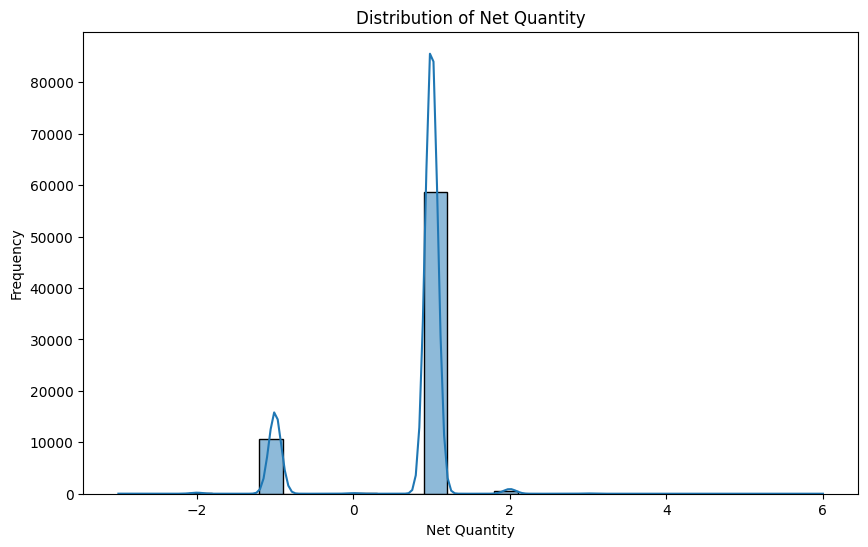

In [61]:
# Distribution of Net Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['net_quantity'], bins=30, kde=True)
plt.title('Distribution of Net Quantity')
plt.xlabel('Net Quantity')
plt.ylabel('Frequency')
plt.show()

### 4.2 Net Sales VS Net Quantity

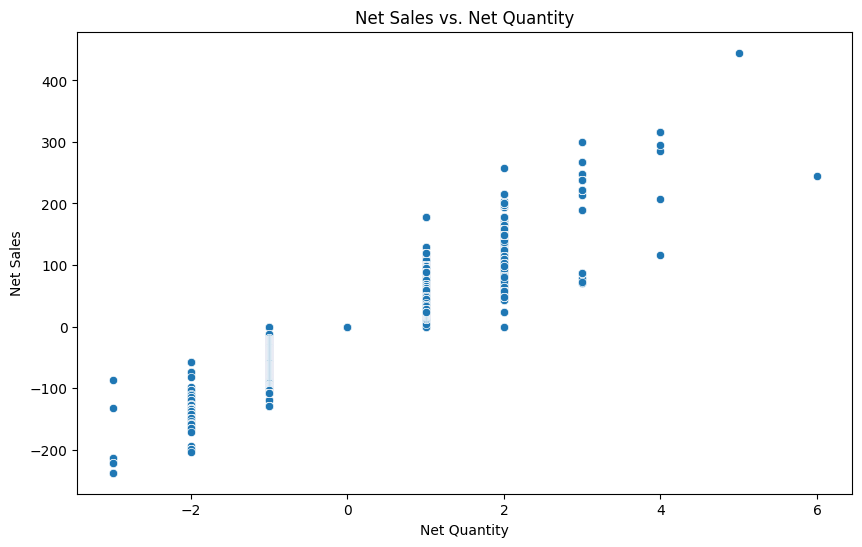

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_quantity', y='net_sales', data=df)
plt.title('Net Sales vs. Net Quantity')
plt.xlabel('Net Quantity')
plt.ylabel('Net Sales')
plt.show()

### 4.3 Total Returned vs. Total Ordered Quantity by Product

<Figure size 1200x600 with 0 Axes>

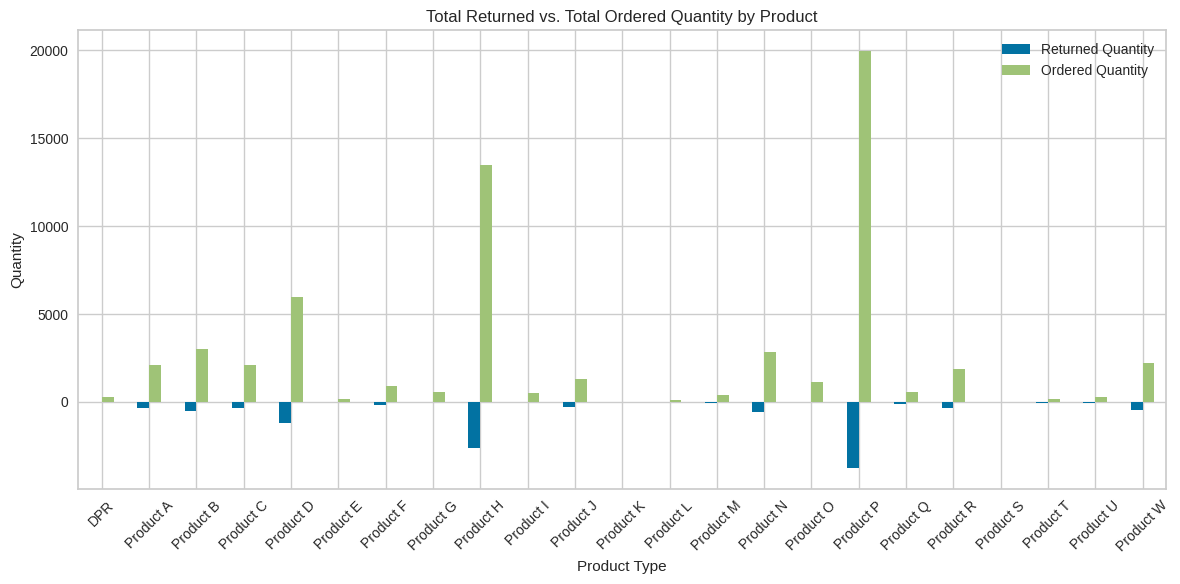

In [102]:
# Group the data by product and calculate the total returned and ordered quantities
product_totals = df.groupby('product_type').agg({'returned_item_quantity': 'sum', 'ordered_item_quantity': 'sum'})

# Create a bar plot to compare the totals
plt.figure(figsize=(12, 6))
product_totals.plot(kind='bar', figsize=(12, 6))
plt.title('Total Returned vs. Total Ordered Quantity by Product')
plt.xlabel('Product Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(['Returned Quantity', 'Ordered Quantity'])
plt.tight_layout()
plt.show()


## 5.0 Feature engineering
### 5.1 Count of the number of transaction for each product type

In [53]:
product_type_counts = df['product_type'].value_counts().reset_index()
product_type_counts.columns = ['product_type', 'count']

product_type_counts


,product_type,count
0,Product P,23352
1,Product H,15963
2,Product D,7079
3,Product B,3510
4,Product N,3348
5,Product W,2677
6,Product A,2461
7,Product C,2456
8,Product R,2106
9,Product J,1549


### 5.2 Average return rate for each product type

In [49]:
# if net_quantity = 0, then is return
df['is_return'] = df['net_quantity'] == 0

# Calculate the average return rate for each product_type
return_rate_by_product = df.groupby('product_type')['is_return'].mean().reset_index()
return_rate_by_product.columns = ['product_type', 'average_return_rate']

print(return_rate_by_product)

   product_type  average_return_rate
0           DPR             0.003759
1     Product A             0.000000
2     Product B             0.000570
3     Product C             0.000407
4     Product D             0.000989
5     Product E             0.000000
6     Product F             0.000948
7     Product G             0.001825
8     Product H             0.000877
9     Product I             0.000000
10    Product J             0.001291
11    Product K             0.000000
12    Product L             0.000000
13    Product M             0.000000
14    Product N             0.005675
15    Product O             0.000000
16    Product P             0.000685
17    Product Q             0.001567
18    Product R             0.000475
19    Product S             0.000000
20    Product T             0.000000
21    Product U             0.000000
22    Product W             0.000747


In [54]:
# Merge product_type, count with average return rate

product_summary = pd.merge(product_type_counts, return_rate_by_product, on='product_type')
product_summary

,product_type,count,average_return_rate
0,Product P,23352,0.000685
1,Product H,15963,0.000877
2,Product D,7079,0.000989
3,Product B,3510,0.000570
4,Product N,3348,0.005675
5,Product W,2677,0.000747
6,Product A,2461,0.000000
7,Product C,2456,0.000407
8,Product R,2106,0.000475
9,Product J,1549,0.001291


### 5.3 Calculate the total sales of each product_type

In [57]:
# Calculate total sales for each product type
total_sales_by_product = df.groupby('product_type')['net_sales'].sum().reset_index()

# Merge total sales into product_summary
product_summary = pd.merge(product_summary, total_sales_by_product, on='product_type')
product_summary

,product_type,count,average_return_rate,net_sales
0,Product P,23352,0.000685,1123791.96
1,Product H,15963,0.000877,708320.69
2,Product D,7079,0.000989,302613.41
3,Product B,3510,0.000570,176144.31
4,Product N,3348,0.005675,86675.01
5,Product W,2677,0.000747,118294.52
6,Product A,2461,0.000000,173388.87
7,Product C,2456,0.000407,119540.33
8,Product R,2106,0.000475,43557.58
9,Product J,1549,0.001291,100388.44


In [58]:
product_summary.rename(columns = {"net_sales" : "total_net_sales"},
                               inplace = True)

product_summary.columns

Index(['product_type', 'count', 'average_return_rate', 'total_net_sales'], dtype='object')

## 6.0 EDA on the new features
### 6.1 Count for each product type

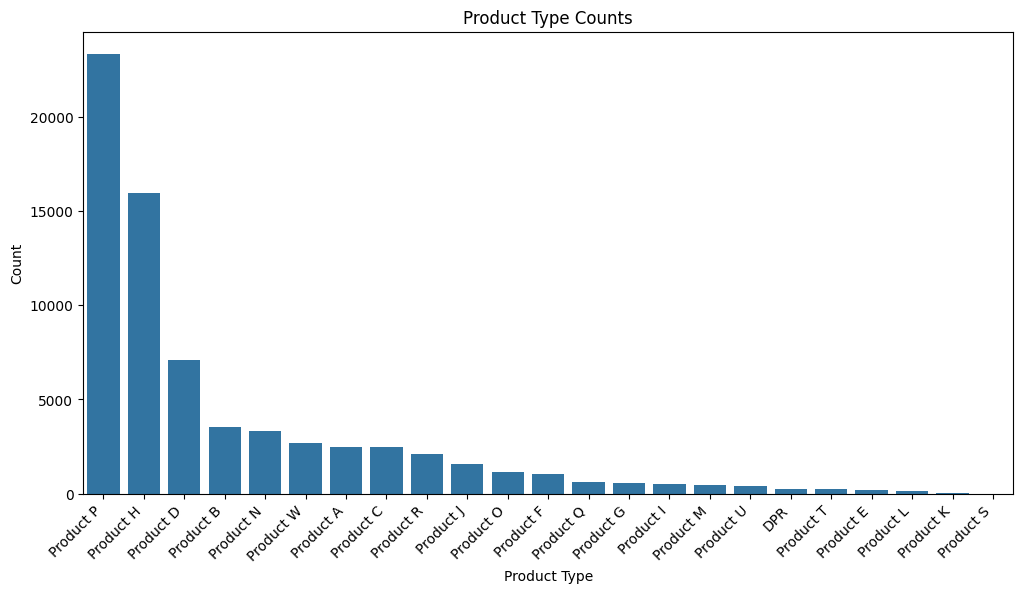

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='count', data=product_summary)
plt.title('Product Type Counts')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6.2 Average Return Rate for each product type

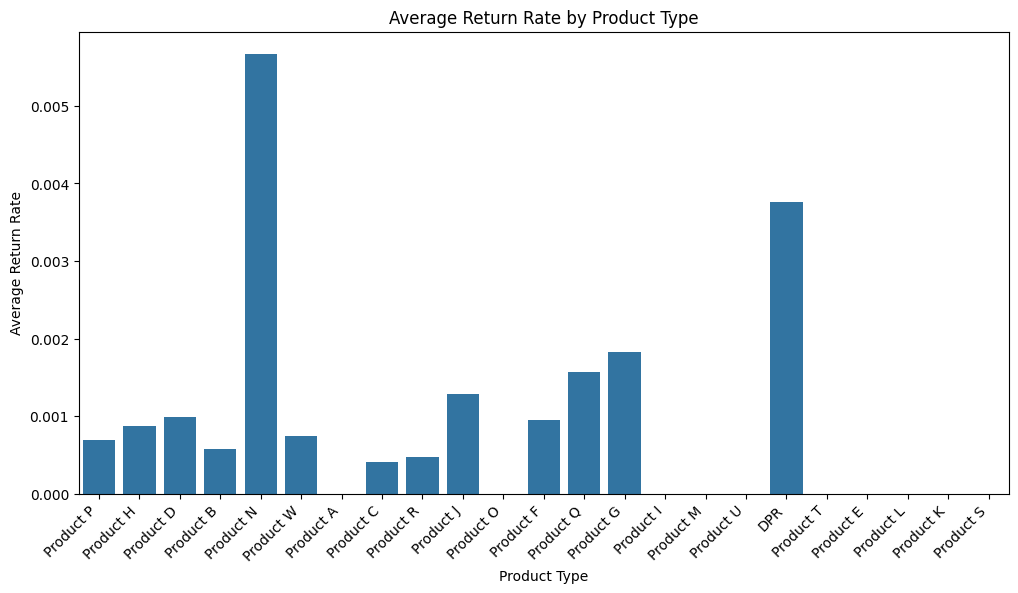

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='average_return_rate', data=product_summary)
plt.title('Average Return Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Return Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

### 6.3 Total net sales for each product type

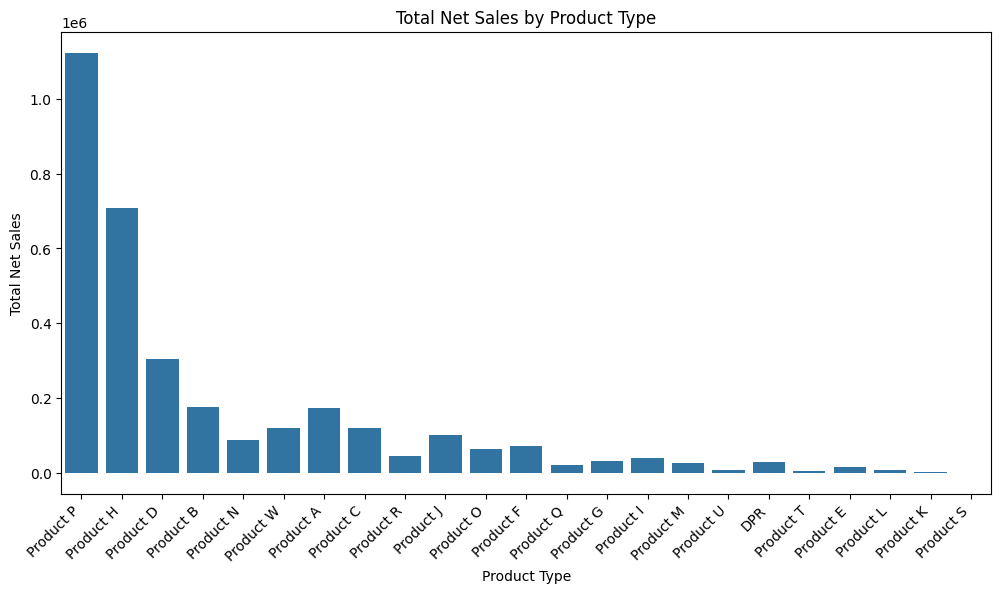

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='total_net_sales', data=product_summary)
plt.title('Total Net Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Net Sales')
plt.xticks(rotation=45, ha='right')
plt.show()


### 6.4 Total net sales, average return rate and count

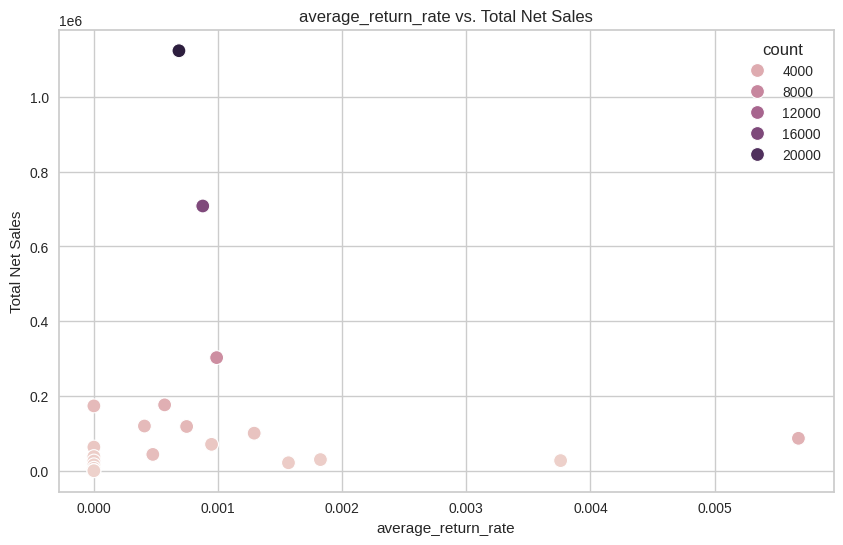

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_return_rate', y='total_net_sales', hue='count', data=product_summary, s=100)
plt.title('average_return_rate vs. Total Net Sales')
plt.xlabel('average_return_rate')
plt.ylabel('Total Net Sales')
plt.show()

## 7.0 Data normalisation

In [71]:
# Initialise min-max scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(product_summary[['count', 'average_return_rate', 'total_net_sales']])

# Create a new df with the scaled values
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_count', 'scaled_average_return_rate', 'scaled_total_net_sales'])

# Combine scaled values df with product_summary
product_summary_scaled = pd.concat([product_summary, scaled_df], axis=1)

product_summary_scaled

,product_type,count,average_return_rate,total_net_sales,scaled_count,scaled_average_return_rate,scaled_total_net_sales
0,Product P,23352,0.000685,1123791.96,1.000000,0.120733,1.000000
1,Product H,15963,0.000877,708320.69,0.683568,0.154542,0.630322
2,Product D,7079,0.000989,302613.41,0.303113,0.174244,0.269332
3,Product B,3510,0.000570,176144.31,0.150272,0.100405,0.156803
4,Product N,3348,0.005675,86675.01,0.143334,1.000000,0.077195
5,Product W,2677,0.000747,118294.52,0.114599,0.131648,0.105329
6,Product A,2461,0.000000,173388.87,0.105349,0.000000,0.154351
7,Product C,2456,0.000407,119540.33,0.105135,0.071747,0.106438
8,Product R,2106,0.000475,43557.58,0.090146,0.083671,0.038830
9,Product J,1549,0.001291,100388.44,0.066293,0.227515,0.089397


## 8.0 Data modeling
### 8.1 Extract only the scaled data

In [72]:
scaled_df = product_summary_scaled[['scaled_count', 'scaled_average_return_rate', 'scaled_total_net_sales']]
scaled_df.head()

,scaled_count,scaled_average_return_rate,scaled_total_net_sales
0,1.000000,0.120733,1.000000
1,0.683568,0.154542,0.630322
2,0.303113,0.174244,0.269332
3,0.150272,0.100405,0.156803
4,0.143334,1.000000,0.077195


### 8.1 Identify the most optimal K value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

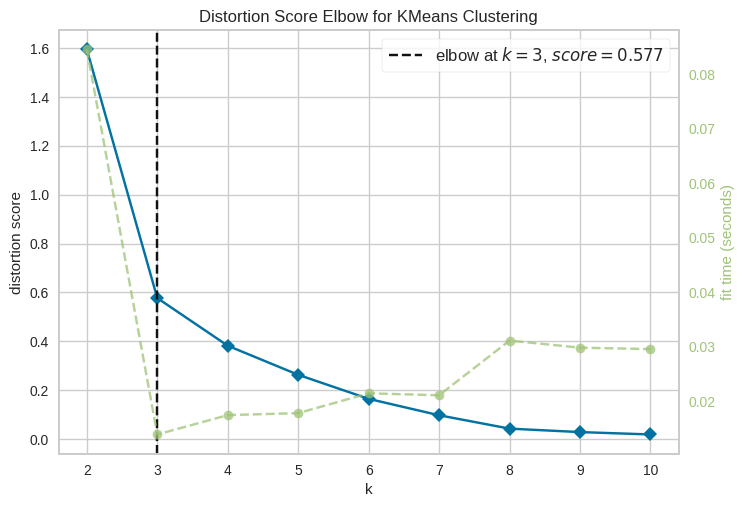

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# Initialize the KElbowVisualizer with the KMeans estimator and a range of K values
Elbow_M = KElbowVisualizer(KMeans(), k=10)

# Fit the visualizer to the PCA-transformed data
Elbow_M.fit(scaled_df)

# Display the Elbow Method plot
Elbow_M.show()

### 8.2 Build and fit the model

In [75]:
kmeans_model = KMeans(n_clusters = 3,
                      init='k-means++',
                      max_iter=500,
                      random_state=42)



*   init parameter with the k-means++ allows the algorithm to place initial centers smartly, rather than random.
*   max_iter is the maximum number of iterations of the algorithm in a single run, default value is 300.
*   random_state guarantees the reproducibility of the model results.



In [76]:
kmeans_model.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0], dtype=int32)

### 8.3 Assign the clusters to each product type

In [81]:
# Assign the clusters to each row in the df
product_summary_scaled['cluster'] = kmeans_model.labels_

product_summary_scaled.head()

,product_type,count,average_return_rate,total_net_sales,scaled_count,scaled_average_return_rate,scaled_total_net_sales,cluster
0,Product P,23352,0.000685,1123791.96,1.000000,0.120733,1.000000,1
1,Product H,15963,0.000877,708320.69,0.683568,0.154542,0.630322,1
2,Product D,7079,0.000989,302613.41,0.303113,0.174244,0.269332,0
3,Product B,3510,0.000570,176144.31,0.150272,0.100405,0.156803,0
4,Product N,3348,0.005675,86675.01,0.143334,1.000000,0.077195,2


### 8.4 Visualise the clusters

In [104]:
# Visualise with a 3D plot
fig = px.scatter_3d(product_summary_scaled,
                    x="count",
                    y="average_return_rate",
                    z="total_net_sales",
                    color='cluster',
                    hover_data=["product_type",
                                "count",
                                "average_return_rate",
                                "total_net_sales"],
                    category_orders = {"cluster_name":
                                       ["0", "1", "2"]}
                    # symbol = "is_center"
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Possible cluster interpretation:

*   Cluster 1 = High demand products (Higher total net sales and count)
*   Cluster 2 = High rate of return products (Higher average return rate)
*   Cluster 3 = Low demand products (Lower total net sales and count)





In [105]:
# import plotly.express as px

# fig = px.scatter_3d(product_summary_scaled,
#                     x="scaled_count",
#                     y="scaled_average_return_rate",
#                     z="scaled_total_net_sales",
#                     color='cluster',
#                     hover_data=["product_type",
#                                 "count",
#                                 "average_return_rate",
#                                 "total_net_sales"],
#                     category_orders = {"cluster_name":
#                                        ["0", "1", "2"]}
#                     # symbol = "is_center"
#                     )

# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
# fig.show()

In [107]:
fig = px.scatter(product_summary_scaled,
                 x='count',
                 y='total_net_sales',
                 color='cluster',
                 hover_data=["product_type",
                             "count",
                             "average_return_rate",
                             "total_net_sales"],
                 category_orders = {"cluster": ["0", "1", "2"]})

fig.show()


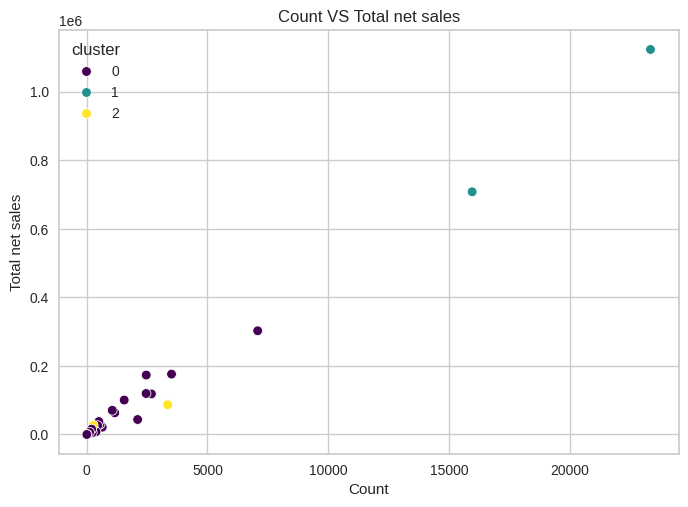

In [89]:
sns.scatterplot(data=product_summary_scaled, x='count', y='total_net_sales', hue='cluster', palette='viridis')
plt.title('Count VS Total net sales')
plt.xlabel('Count')
plt.ylabel('Total net sales')
plt.show()

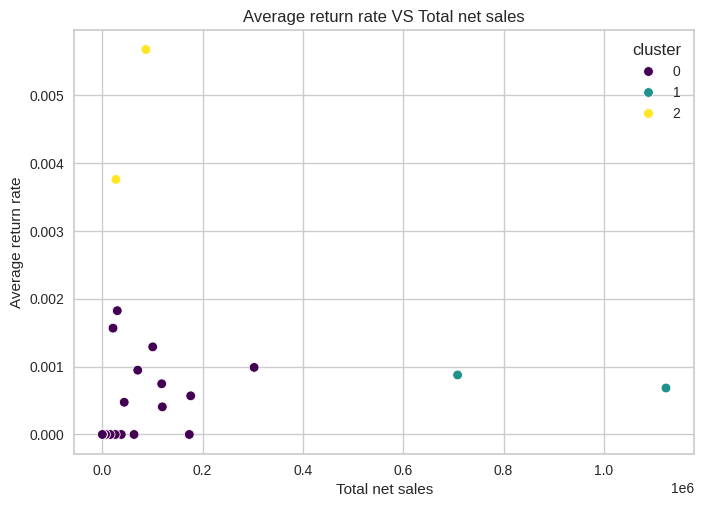

In [88]:
sns.scatterplot(data=product_summary_scaled, x='total_net_sales', y='average_return_rate', hue='cluster', palette='viridis')
plt.title('Average return rate VS Total net sales')
plt.xlabel('Total net sales')
plt.ylabel('Average return rate')
plt.show()

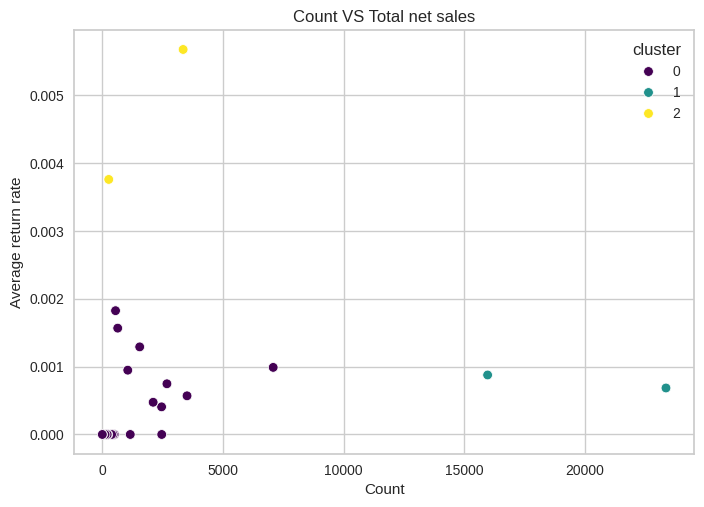

In [90]:
sns.scatterplot(data=product_summary_scaled, x='count', y='average_return_rate', hue='cluster', palette='viridis')
plt.title('Count VS Total net sales')
plt.xlabel('Count')
plt.ylabel('Average return rate')
plt.show()

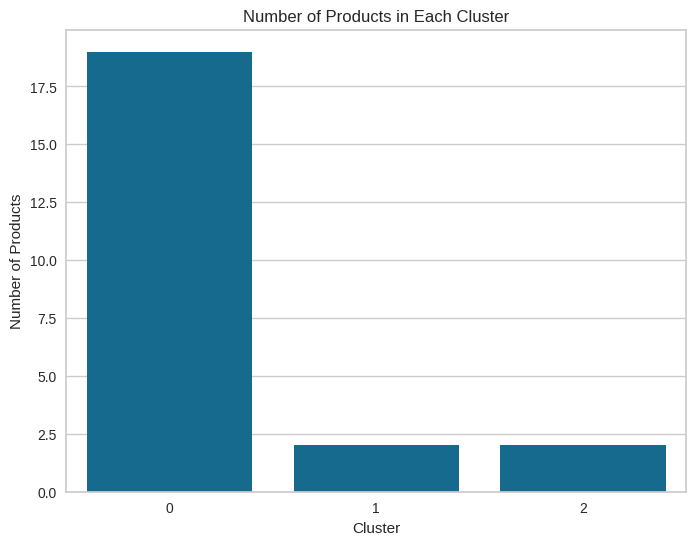

In [106]:
# Count the number of products in each cluster
cluster_counts = product_summary_scaled['cluster'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Number of Products in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.show()


## 9.0 Model evaluation

In [95]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_df, kmeans_model.labels_)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_df, kmeans_model.labels_)
print("Davies-Bouldin Index:", davies_bouldin)


Silhouette Score: 0.7143666708636903
Davies-Bouldin Index: 0.39013505412593297


The Silhouette Score is a metric used to evaluate the quality of clusters created by clustering algorithms. It measures how similar a data point is to its own cluster compared to other clusters.

*   +1 indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters.
*   0 indicates that the data point is on or very close to the decision boundary between two neighboring clusters.
*   -1 indicates that the data point might have been assigned to the wrong cluster.  


The Davies-Bouldin Index measures the average ‘similarity’ between clusters, where similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Lower values indicate better clustering.


